In [22]:
import math
import matplotlib as mpl 
import matplotlib.pyplot as plt 

def bpf(a, n, e):
    m = len(a)
    if m == 1:
        return a
    else:
        b_ch = []
        b_nch = []
        for i in range(m):
            if i % 2 == 0:
                b_ch.append(a[i])
            else:
                b_nch.append(a[i])
        b_ch = bpf(b_ch, n, e)
        b_nch = bpf(b_nch, n, e)
        
        y = [0 for i in range(len(a))]
        w_n = e ** ((2*math.pi*complex(0, 1)) / n)
        w_n = w_n ** (n // m)
        w = 1
        for i in range(m // 2):
            t = w*b_nch[i]
            y[i] = b_ch[i] + t
            y[i+(m//2)] = b_ch[i] - t
            w = w*w_n
        return y
    
def obpf(a, n):    
    y = bpf(a, n, math.e ** (-1))
    for i in range(len(y)):
        y[i] /= n
    return y

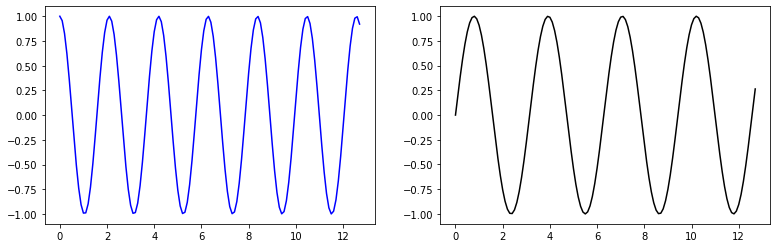

In [23]:
x = [0.1*i for i in range(128)]
y = []
z = []

n = len(x)

for i in range(n):
    y.append(math.cos(3*x[i]))
    z.append(math.sin(2*x[i]))

fig, axs = plt.subplots(1, 2, figsize=(13, 4))
axs[0].plot(x, y, color='blue') 
axs[1].plot(x, z, color="black")

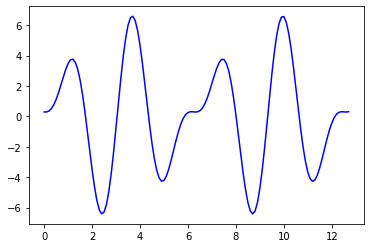

In [24]:
#Свёртка

a = bpf(y, len(y), math.e)
b = bpf(z, len(z), math.e)
c = []
for i in range(len(a)):
    c.append(a[i]*b[i])
c = obpf(c, len(c))
plt.plot(x, c, color="blue")

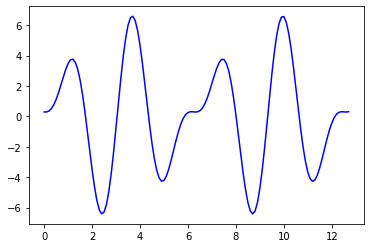

In [50]:
q = []

for i in range(len(x)):
    v = 0
    for j in range(len(x)):
        v += y[j]*z[i-j]
    q.append(v )
plt.plot(x, q, color="blue")

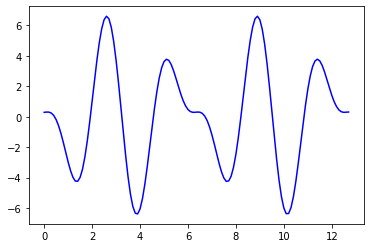

In [26]:
#Корреляция

a = bpf(y, len(y), math.e)
b = bpf(z, len(z), math.e)
c = []
for i in range(len(a)):
    b[i] = b[i].conjugate()
    c.append(a[i]*b[i])
c = obpf(c, len(c))
plt.plot(x, c, color="blue")

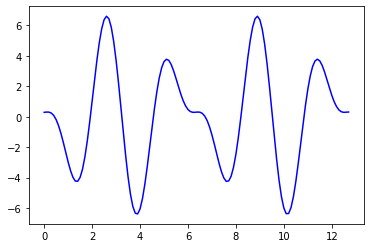

In [53]:
q = []

for i in range(len(x)):
    v = 0
    for j in range(len(x)):
        if i+j >= len(x):
            v += z[j]*y[i+j-len(x)]
        else:
            v += z[j]*y[i+j]
    q.append(v)
plt.plot(x, q, color="blue")